In [1]:
# Building the design matrix following the indications at
# https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Randomise/UserGuide - see "Repeated measures ANOVA"
# https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FEAT/UserGuide#ANOVA:_1-factor_4-levels

import numpy as np
import matplotlib.pyplot as plt


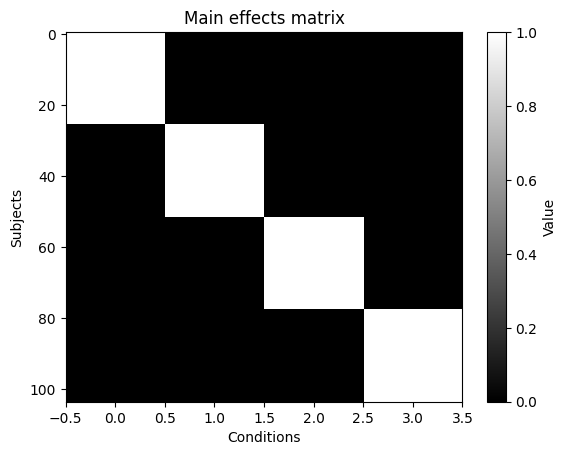

In [2]:
# Main effects matrix
num_subjects = 26
num_conditions = 4

# Initialize the design matrix with zeros
main_effects = np.zeros((num_subjects * num_conditions, num_conditions))

# Populate the design matrix
for i in range(num_conditions):
    start_row = i * num_subjects
    end_row = (i + 1) * num_subjects
    main_effects[start_row:end_row, i] = 1

# Display the design matrix as an image
plt.imshow(main_effects, cmap='gray', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Conditions')
plt.ylabel('Subjects')
plt.title('Main effects matrix')
plt.show()

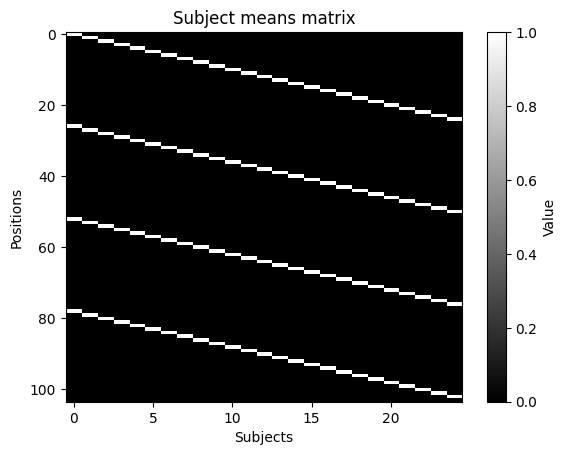

In [3]:
# Initialize the design matrix with zeros
sub_means = np.zeros((num_subjects * num_conditions, num_subjects))

# Populate the design matrix
for sub in range(num_subjects):
    for cond in range(num_conditions):
        position = sub + (num_subjects * cond)
        sub_means[position, sub] = 1

# Remove the last column to avoid rank deficiency
sub_means = sub_means[:, :-1]

# Display the design matrix as an image
plt.imshow(sub_means, cmap='gray', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Subjects')
plt.ylabel('Positions')
plt.title('Subject means matrix')
plt.show()

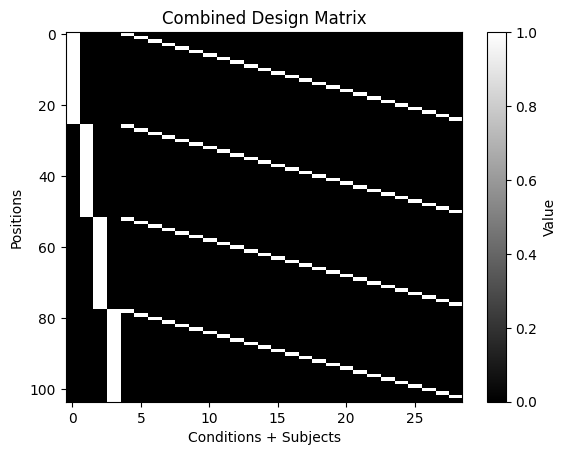

In [6]:
# Concatenate the main_effects and sub_means matrices by rows
combined_matrix = np.hstack((main_effects, sub_means))

# Write the combined_matrix to a text file with tab separator
np.savetxt('py_design_mat.txt', combined_matrix, delimiter='\t')

# Display the combined design matrix as an image
plt.imshow(combined_matrix, cmap='gray', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('Conditions + Subjects')
plt.ylabel('Positions')
plt.title('Combined Design Matrix')
plt.show()

In [7]:
# Generate py_design.mat
# https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM/CreatingDesignMatricesByHand
!Text2Vest py_design_mat.txt design.mat

In [11]:
# Create the matrix of contrasts and the corresponding design.con file
num_columns = combined_matrix.shape[1]
contrast_matrix = np.zeros((4, num_columns))

for i in range(4):
    contrast_matrix[i, i] = 1
    
np.savetxt('py_design_con.txt', contrast_matrix, delimiter='\t')
!Text2Vest py_design_con.txt design.con

In [16]:
# Create the fts matrix of F contrasts
!echo 1 1 1 1 > py_design_fts.txt
!echo  >> py_design_fts.txt
!Text2Vest py_design_fts.txt design.fts

In [ ]:
# Create the design.grp 

# Initialize the vector with zeros
vector = np.zeros((num_subjects * num_conditions, 1), dtype=int)

# Populate the vector
for sub in range(1, num_subjects + 1):
    for cond in range(num_conditions):
        position = sub + (num_subjects * cond) - 1  # adjust for 0-indexing
        vector[position, 0] = sub

# Display the vector
print(vector)


# Write to design.grp file
file_path = 'design.grp'

with open(file_path, 'w') as f:
    f.write('/NumWaves       1\n')
    f.write('/NumPoints      {}\n\n'.format(num_subjects * num_conditions))
    f.write('/Matrix\n')
    for value in vector:
        f.write('{}\n'.format(value[0]))